In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sisepuede.manager.sisepuede_examples as sxl

from generate import main

In [4]:
manager = sxl.SISEPUEDEExamples()

In [5]:
attr = manager.model_attributes.build_variable_dataframe_by_sector(
    None,
    include_model_variable = True,
    include_model_variable_attributes = True,
    include_simplex_group_as_trajgroup = False,
    include_time_periods = False,
)

In [6]:
df_in, df_out = main("BRA")

wanted_cols = [c for c in df_out.columns if c.startswith("emission_co2e_subsector_total")] + ["time_period"]
df_plot = (
    df_out
    [wanted_cols]
    # .rename(columns={
    #     "emission_co2e_subsector_total_agrc": "Agricultura",
    #     "emission_co2e_subsector_total_frst": "Bosques",
    #     "emission_co2e_subsector_total_lndu": "Uso de suelo",
    #     "emission_co2e_subsector_total_lsmm": "Estiércol",
    #     "emission_co2e_subsector_total_lvst": "Ganado",
    #     "emission_co2e_subsector_total_soil": "Tierra",
    # })
    .assign(time_period=lambda df: (df["time_period"] + 2000))
    .set_index("time_period")
)

df_total = df_plot.sum(axis=1)
df_total.index = df_total.index.astype(str)

In [31]:
(df_area.loc[2020, "settlements"] - df_area.loc[2000, "settlements"]) / df_area.loc[2000, "settlements"]

np.float64(0.44149735805426527)

In [7]:
df_area = pd.read_csv("./data/areas.csv").set_index("label").T.reset_index(names="year").assign(year=lambda df: (df["year"].astype(int) + 2000)).set_index("year")

(0.0, 521000.0)

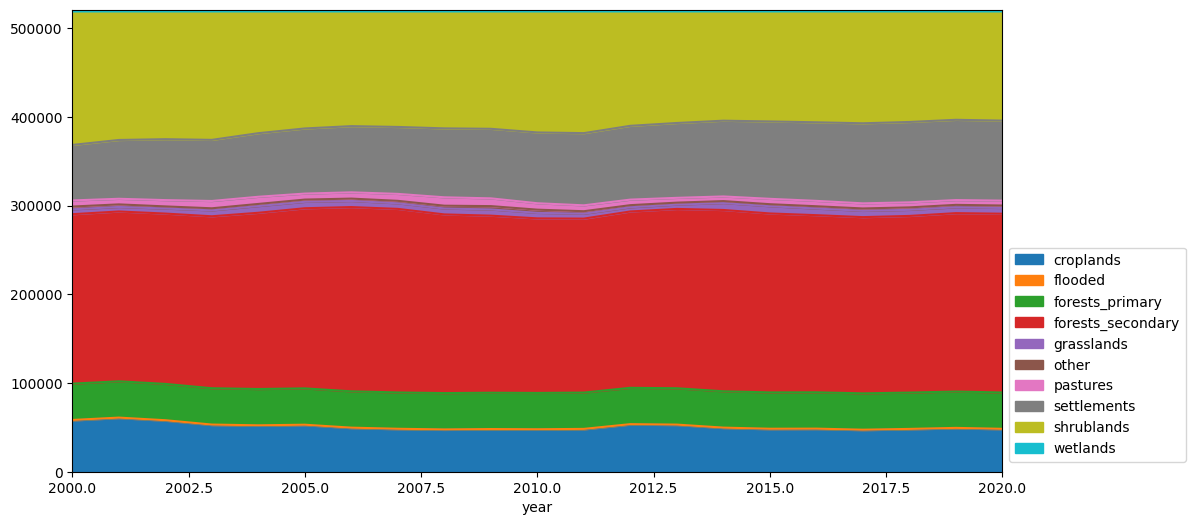

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
df_area.plot.area(ax=ax)
ax.set_xlim(2000, 2020)
ax.legend(bbox_to_anchor=(1, 0.5))
ax.set_ylim(0, 521_000)

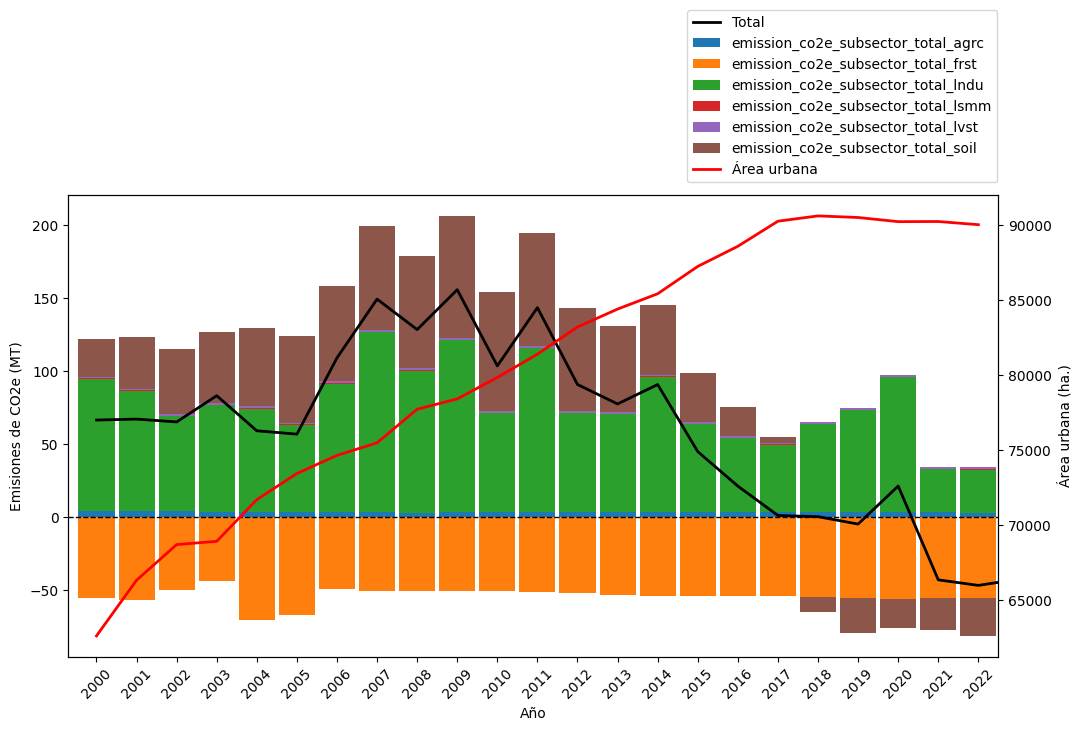

In [216]:
fig, ax = plt.subplots(figsize=(12, 6))
df_plot.plot.bar(stacked=True, width=0.9, ax=ax, legend=False)
df_total.plot(ax=ax, color="black", linewidth=2, label="Total")
ax.axhline(0, color="black", linewidth=1, linestyle="--")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel("Año")
ax.set_ylabel("Emisiones de CO2e (MT)")

ax.set_xlim(-0.7, 22.5)

ax2 = ax.twinx()
temp = df_area.copy()
temp.index = temp.index.astype(str)
temp["settlements"].plot(ax=ax2, c="r", lw="2", label="Área urbana")
ax2.set_ylabel("Área urbana (ha.)")

fig.legend(bbox_to_anchor=(0.905, 1.2))

<Axes: xlabel='time_period'>

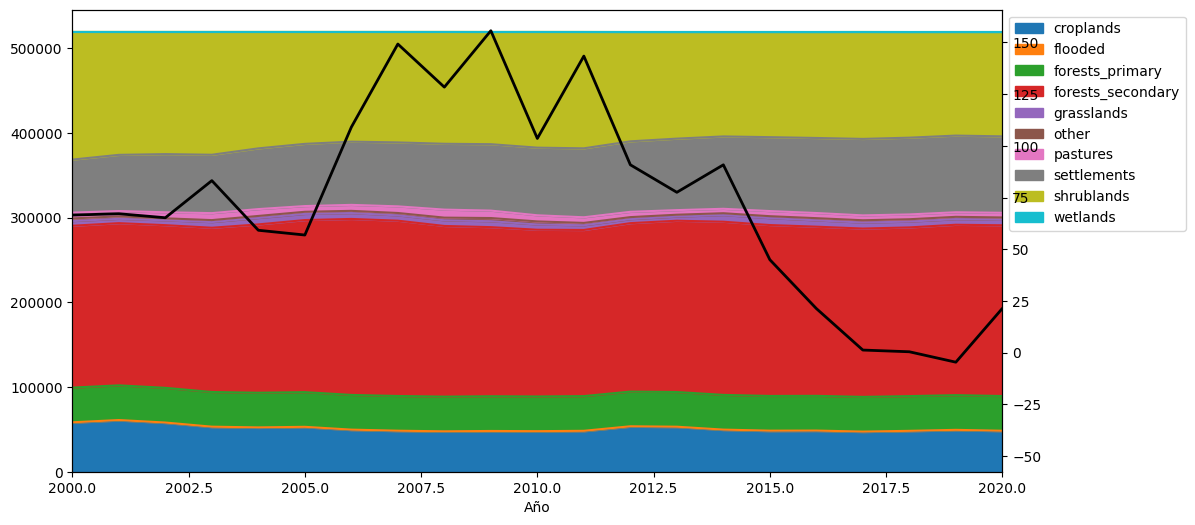

In [174]:
fig, ax = plt.subplots(figsize=(12, 6))
df_area.plot.area(stacked=True, ax=ax)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel("Año")
ax.set_xlim(2000, 2020)

ax2 = ax.twinx()
df_plot.sum(axis=1).plot(ax=ax2, c="k", lw=2)